# A Whale off the Port(folio)
---

In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, andmutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial Imports

import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
path = "C:/Users/bmccr/smu-virt-fin-pt-04-2021-u-c/smu-virt-fin-pt-04-2021-u-c/04-Pandas/Pandas Homework/Starter_Code/Resources/"
whale_df = pd.read_csv(path + "whale_returns.csv")
whale_df.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,2015-03-02,NaN,NaN,NaN,NaN
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
whale_df.dtypes

Date                            object
SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object

In [4]:
# Convert date object to datetime
whale_df["Date"] = pd.to_datetime(whale_df["Date"])

In [5]:
whale_df.dtypes

Date                           datetime64[ns]
SOROS FUND MANAGEMENT LLC             float64
PAULSON & CO.INC.                     float64
TIGER GLOBAL MANAGEMENT LLC           float64
BERKSHIRE HATHAWAY INC                float64
dtype: object

In [6]:
whale_df.shape

(1060, 5)

In [7]:
# Count nulls
whale_df.isnull().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [8]:
# Drop nulls
whale_df.dropna(inplace = True)

In [9]:
whale_df.shape

(1059, 5)

In [10]:
whale_df.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
5,2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [11]:
# Reading algorithmic returns
algo_df = pd.read_csv(path + "algo_returns.csv")
algo_df.head()

,Date,Algo 1,Algo 2
0,2014-05-28,0.001745,NaN
1,2014-05-29,0.003978,NaN
2,2014-05-30,0.004464,NaN
3,2014-06-02,0.005692,NaN
4,2014-06-03,0.005292,NaN


In [12]:
algo_df.dtypes

Date       object
Algo 1    float64
Algo 2    float64
dtype: object

In [13]:
# Convert date object to datetime
algo_df["Date"] = pd.to_datetime(algo_df["Date"])

In [14]:
algo_df.dtypes

Date      datetime64[ns]
Algo 1           float64
Algo 2           float64
dtype: object

In [15]:
# Count nulls
algo_df.isnull().sum()

Date      0
Algo 1    0
Algo 2    6
dtype: int64

In [16]:
algo_df.shape

(1241, 3)

In [17]:
# Drop nulls
algo_df.dropna(inplace = True)

In [18]:
algo_df.shape

(1235, 3)

In [19]:
algo_df.head()

,Date,Algo 1,Algo 2
6,2014-06-05,0.004062,0.013285
7,2014-06-06,0.001857,0.008284
8,2014-06-09,-0.005012,0.005668
9,2014-06-10,0.004406,-0.000735
10,2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data.

In [20]:
# Reading S&P 500 Closing Prices
sp_df = pd.read_csv(path + "sp500_history.csv")
sp_df.head()

,Date,Close
0,23-Apr-19,$2933.68
1,22-Apr-19,$2907.97
2,18-Apr-19,$2905.03
3,17-Apr-19,$2900.45
4,16-Apr-19,$2907.06


In [21]:
# Data is in reverse date order compared to other dataframes, so we will reverse the order to match others (ascending)
sp_df = sp_df[::-1]
sp_df.head()

,Date,Close
1648,1-Oct-12,$1444.49
1647,2-Oct-12,$1445.75
1646,3-Oct-12,$1450.99
1645,4-Oct-12,$1461.40
1644,5-Oct-12,$1460.93


In [22]:
# Check data types
sp_df.dtypes

Date     object
Close    object
dtype: object

In [23]:
# Fix Data Types
sp_df["Date"] = pd.to_datetime(sp_df["Date"])

In [24]:
sp_df.dtypes

Date     datetime64[ns]
Close            object
dtype: object

In [25]:
# Clean data by removing $ signs
sp_df["Close"] = sp_df["Close"].str.replace("$" , "")
sp_df.head()

,Date,Close
1648,2012-10-01,1444.49
1647,2012-10-02,1445.75
1646,2012-10-03,1450.99
1645,2012-10-04,1461.40
1644,2012-10-05,1460.93


In [26]:
# Clean data by changing close object to float
sp_df["Close"] = pd.to_numeric(sp_df["Close"])

In [27]:
sp_df.dtypes

Date     datetime64[ns]
Close           float64
dtype: object

In [28]:
# Calculate Daily Returns (change close from price to percentage change)
sp_df["Close"] = sp_df["Close"].pct_change()

In [29]:
sp_df.head()

,Date,Close
1648,2012-10-01,NaN
1647,2012-10-02,0.000872
1646,2012-10-03,0.003624
1645,2012-10-04,0.007174
1644,2012-10-05,-0.000322


In [30]:
# Count nulls
sp_df.isnull().sum()

Date     0
Close    1
dtype: int64

In [31]:
sp_df.shape

(1649, 2)

In [32]:
# Drop nulls
sp_df.dropna(inplace = True)

In [33]:
sp_df.shape

(1648, 2)

In [34]:
# Rename `Close` column to be specific to this portfolio (not to be confused with close values from other dataframes)
sp_df["S&P500"] = sp_df["Close"]
sp_df.head()

,Date,Close,S&P500
1647,2012-10-02,0.000872,0.000872
1646,2012-10-03,0.003624,0.003624
1645,2012-10-04,0.007174,0.007174
1644,2012-10-05,-0.000322,-0.000322
1643,2012-10-08,-0.003457,-0.003457


In [35]:
# Remove `Close` column since we just added that column under a new name (S&P500)
del sp_df["Close"]
sp_df.head()

,Date,S&P500
1647,2012-10-02,0.000872
1646,2012-10-03,0.003624
1645,2012-10-04,0.007174
1644,2012-10-05,-0.000322
1643,2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P500 Returns

In [36]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
whale_algo_df = pd.merge(left = whale_df, right = algo_df, how = "inner")
whale_algo_df.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2
0,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949
1,2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416
2,2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323
3,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460
4,2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303


In [37]:
# Since you can only merge 2 dataframes at a time, add the 3rd (S&P500) dataframe
combined_df = pd.merge(left = whale_algo_df, right = sp_df, how = "inner")
combined_df.set_index("Date", inplace = True)
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Analysis
#### Calculate and Plot the daily returns

<AxesSubplot:xlabel='Date'>

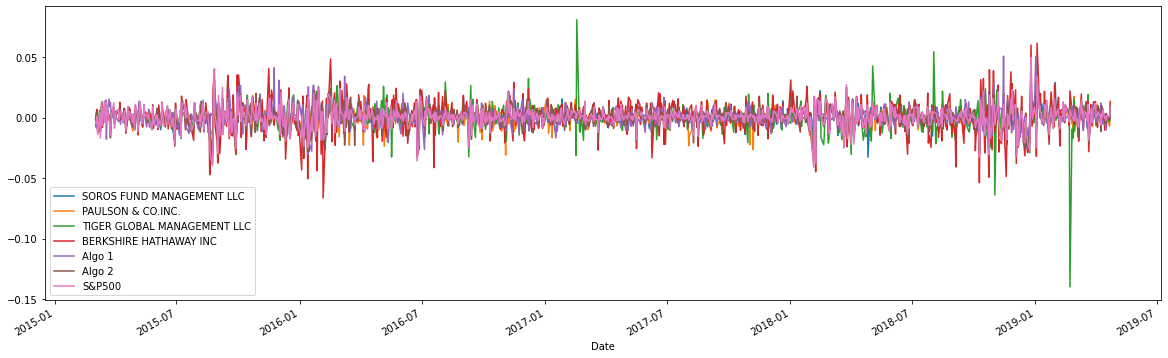

In [38]:
# Plot daily returns of all portfolios
combined_df.plot(figsize = (20,6))

#### Calculate and Plot cumulative returns

In [39]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1+combined_df).cumprod()
cumulative_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,
2015-03-03,0.998734,0.995019,0.999504,0.993431,0.998058,0.999051,0.995461
2015-03-04,1.000962,0.998245,0.996972,0.997617,0.989486,1.001464,0.991093
2015-03-05,1.004981,1.002314,0.999319,1.004327,0.988541,1.005794,0.992278
2015-03-06,0.997037,0.998731,0.990844,0.991172,0.983641,0.994267,0.978214
2015-03-09,0.997617,1.002951,0.996633,0.989534,0.978283,0.995563,0.982072


<AxesSubplot:xlabel='Date'>

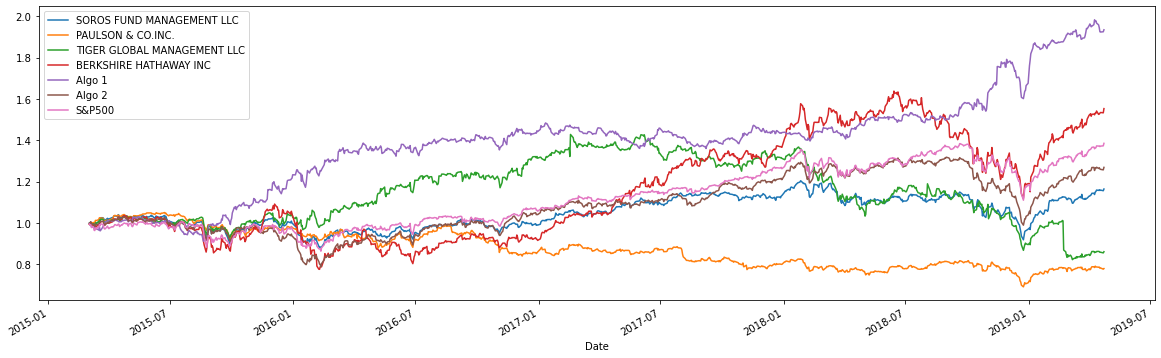

In [40]:
# Plot cumulative returns
cumulative_returns.plot(figsize = (20,6))

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio.
2. Calculate the standard deviation for all portfolios.
3. Determine which portfolios are riskier than the S&P 500.
4. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio

<AxesSubplot:>

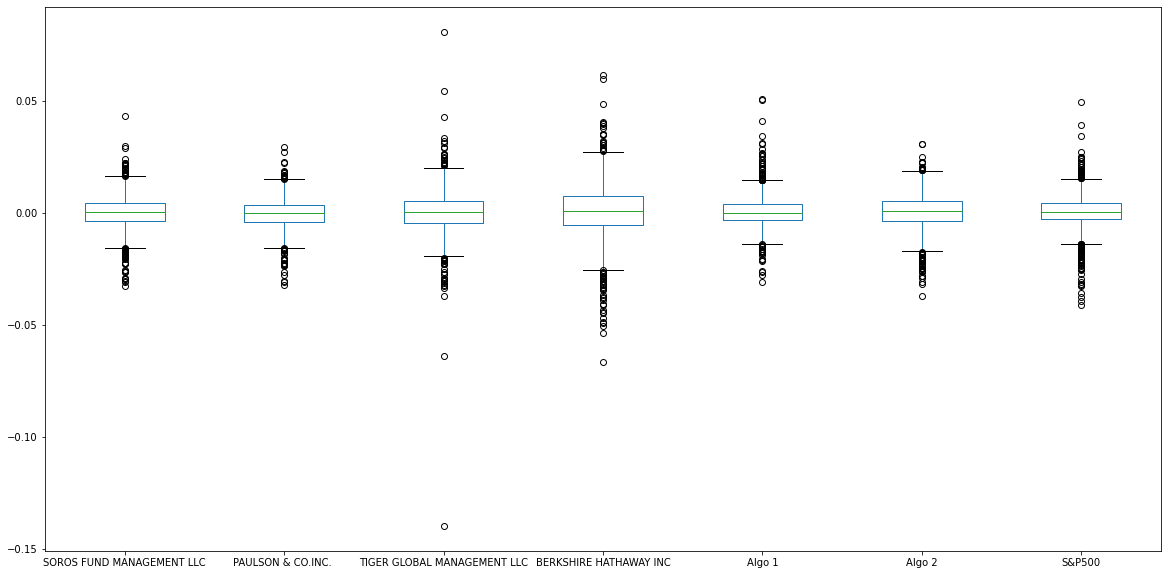

In [41]:
# Box plot to visually show risk
combined_df.plot(kind = "box", figsize = (20,10))

### Calculate Standard Deviation

In [42]:
# Calculate the daily standard deviation of all portfolios
combined_std = combined_df.std()
combined_std

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P500                         0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [43]:
# Calculate the daily standard deviation of the S&P 500
sp_std = combined_df["S&P500"].std()
sp_std

0.008553731597758204

In [44]:
# Determine which portfolios are riskier than the S&P 500

riskier = []

for x,y in combined_std.iteritems():
    if y > sp_std:
        riskier.append({x})
print(f"The following portfolios are RISKIER than the S&P500: {riskier}")

The following portfolios are RISKIER than the S&P500: [{'TIGER GLOBAL MANAGEMENT LLC'}, {'BERKSHIRE HATHAWAY INC'}]


### Calculate the Annualized Standard Deviation

In [45]:
# Calculate the annualized standard deviation (252 trading days)
combined_df.groupby(combined_df.index.year).std()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,
2015,0.007922,0.005959,0.008443,0.012681,0.008920,0.008651,0.009936
2016,0.007988,0.008246,0.010295,0.014039,0.008366,0.009676,0.008249
2017,0.004942,0.005935,0.008290,0.008566,0.005220,0.005431,0.004212
2018,0.009965,0.007484,0.012484,0.015265,0.007548,0.009056,0.010742
2019,0.007434,0.007104,0.018166,0.012797,0.007980,0.007811,0.007835


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta.

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P500.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P500.

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [46]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_df = combined_df.rolling(window = 21).std()
rolling_df.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,
2019-04-16,0.006711,0.006224,0.007532,0.009731,0.005760,0.007053,0.006498
2019-04-17,0.006773,0.006370,0.007574,0.009485,0.006229,0.007165,0.006537
2019-04-18,0.006633,0.006303,0.007328,0.009475,0.005834,0.007172,0.006470
2019-04-22,0.005915,0.006400,0.006197,0.009104,0.005831,0.007113,0.006094
2019-04-23,0.004315,0.005695,0.004949,0.006602,0.005889,0.005582,0.004325


<AxesSubplot:xlabel='Date'>

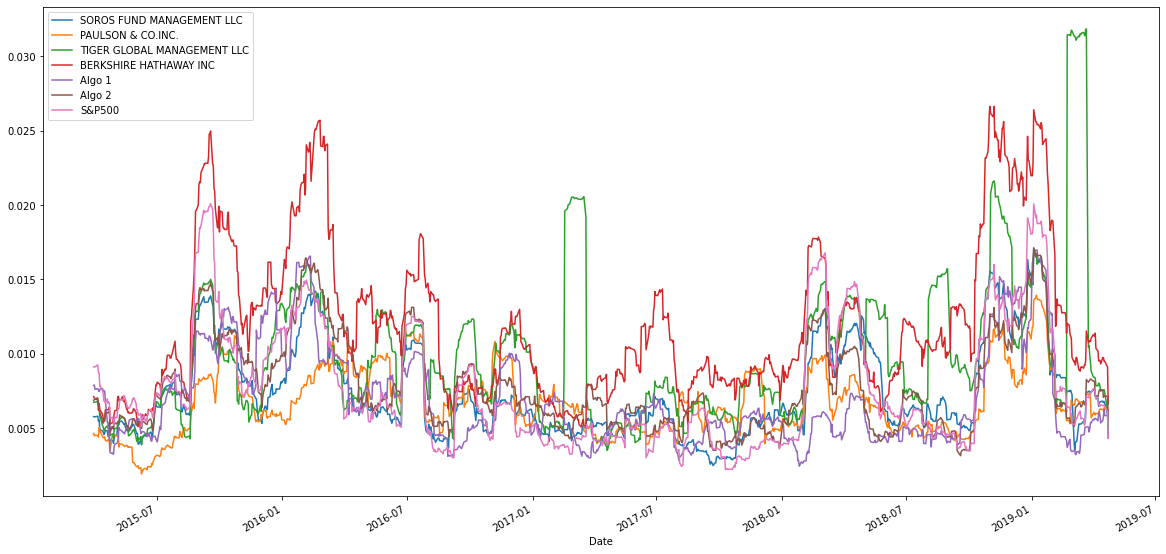

In [47]:
rolling_df.plot(figsize = (20,10))

### Calculate and plot the correlation

In [48]:
# Calculate the correlation
correlation = combined_df.corr()

<AxesSubplot:>

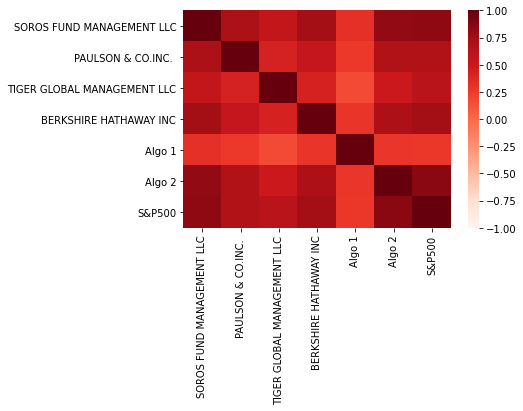

In [49]:
# Display the correlation matrix
sns.heatmap(correlation, cmap = "Reds", vmin = -1, vmax = 1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [50]:
# Calculate covariance of a single portfolio
covariance = combined_df["Algo 1"].rolling(window = 60).cov(combined_df["S&P500"])
covariance.tail()

Date
2019-04-16    0.000001
2019-04-17    0.000003
2019-04-18    0.000003
2019-04-22    0.000003
2019-04-23    0.000003
dtype: float64

In [51]:
# Calculate variance of S&P 500
variance = combined_df["S&P500"].rolling(window = 60).var()
variance.tail()

Date
2019-04-16    0.000041
2019-04-17    0.000037
2019-04-18    0.000037
2019-04-22    0.000037
2019-04-23    0.000037
Name: S&P500, dtype: float64

In [52]:
# Computing beta
algo_1_beta = covariance / variance
algo_1_beta.tail()

Date
2019-04-16    0.025920
2019-04-17    0.072232
2019-04-18    0.069934
2019-04-22    0.069525
2019-04-23    0.084337
dtype: float64

<AxesSubplot:xlabel='Date'>

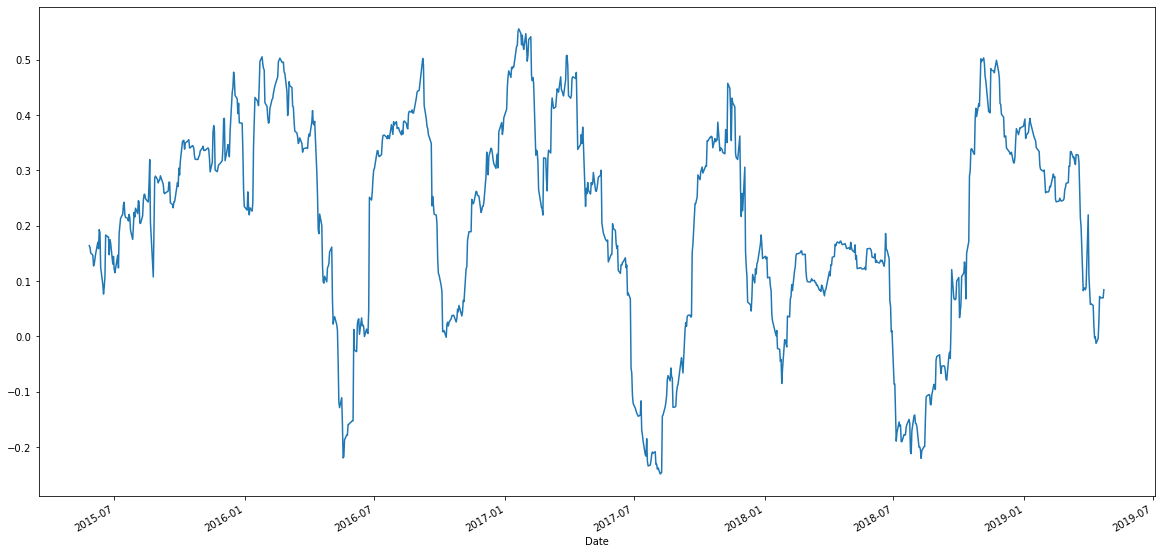

In [53]:
# Plot beta trend
algo_1_beta.plot(figsize = (20,10))

## Rolling Statistics Challenge: Exponentially Weighted Average

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`] (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:xlabel='Date'>

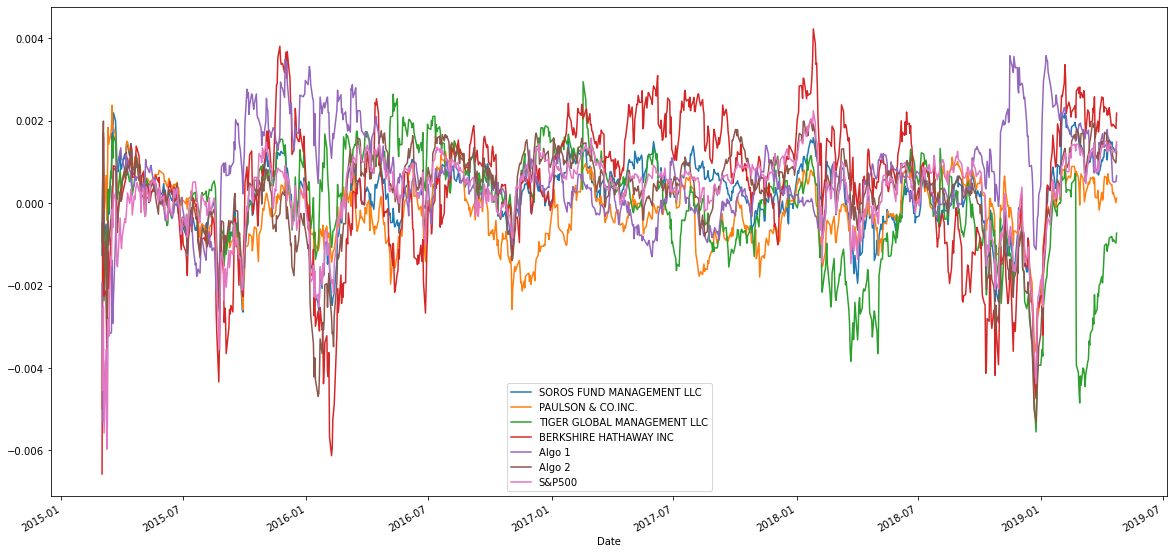

In [54]:
# Use `ewm` to calculate the rolling window
combined_df.ewm(halflife = 21).mean().plot(figsize = (20,10))

---

# Sharpe Ratios
In reality, investment managers and their institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [55]:
# Annualized Sharpe Ratios
sharpe_ratio = combined_df.mean() / combined_df.std() * np.sqrt(252)
sharpe_ratio

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P500                         0.648267
dtype: float64

<AxesSubplot:>

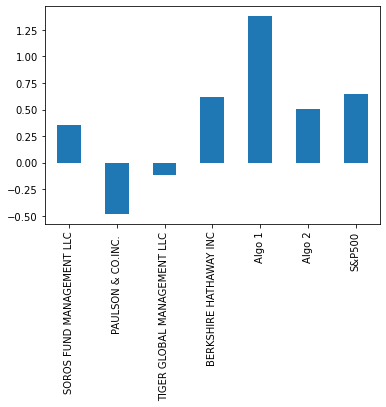

In [56]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot(kind = "bar")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Algorithm 1 is the top performing portfolio. It outperforms all of the whale portfolios as well as the S&P 500.
Algorithm 2 does not outperform the S&P 500 or Berkshire Hathaway Inc. 
However, Algorithm 2 does outperforms the rest of the whales, including: 
Tiger Global Management LLC, Paulson & Co. Inc., Soros Fund Management LLC

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500.

1. Choose 3-5 custom stocks with at least 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares of each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at least 1 year's worth of historic prices 

---

For this demo solution, we fetch data from three companies listed in the S&P 500.

- GOOG - Google, LLC
- AAPL - Apple Inc.
- COST - Costco Wholesale Corporation

In [96]:
# Reading Data from 1st stock
aapl_df = pd.read_csv(path + "aapl_historical.csv")
# Convert date object to datetime and reverse data to ascending order
aapl_df["Trade DATE"] = pd.to_datetime(aapl_df["Trade DATE"])
aapl_df = aapl_df.iloc[::-1]
# Convert closing price to percent change and rename the columns
aapl_df["NOCP"] = aapl_df["NOCP"].pct_change()
aapl_df = aapl_df.rename(columns = {"Symbol" : "Symbol" , "Trade DATE" : "Date" , "NOCP" : "Daily_return_aapl"})
# Drop Null values
aapl_df.dropna(inplace = True)
aapl_df.head()

,Symbol,Date,Daily_return_aapl
248,AAPL,2018-05-14,-0.002333
247,AAPL,2018-05-15,-0.009088
246,AAPL,2018-05-16,0.009333
245,AAPL,2018-05-17,-0.006324
244,AAPL,2018-05-18,-0.003637


In [108]:
# Reading data from 2nd stock
cost_df = pd.read_csv(path + "cost_historical.csv")
# Convert date object to datetime and reverse data to ascending order
cost_df["Trade DATE"] = pd.to_datetime(cost_df["Trade DATE"])
cost_df = cost_df.iloc[::-1]
# Convert closing price to percent change and rename the columns
cost_df["NOCP"] = cost_df["NOCP"].pct_change()
cost_df = cost_df.rename(columns = {"Symbol" : "Symbol" , "Trade DATE" : "Date" , "NOCP" : "Daily_return_cost"})
# Drop Null Values
cost_df.dropna(inplace = True)
cost_df.head()

,Symbol,Date,Daily_return_cost
248,COST,2018-05-14,0.000613
247,COST,2018-05-15,-0.002042
246,COST,2018-05-16,0.016523
245,COST,2018-05-17,0.004479
244,COST,2018-05-18,-0.003206


In [117]:
# Reading data from 3rd stock
goog_df = pd.read_csv(path + "goog_historical.csv")
# Convert date object to datetime and reverse data to ascending order
goog_df["Trade DATE"] = pd.to_datetime(goog_df["Trade DATE"])
goog_df = goog_df.iloc[::-1]
# Convert closing price to percent change and rename the columns
goog_df["NOCP"] = goog_df["NOCP"].pct_change()
goog_df = goog_df.rename(columns = {"Trade DATE" : "Date" , "NOCP" : "Daily_returns_goog"})
# Drop Null Values
goog_df.dropna(inplace = True)
goog_df.head()

,Symbol,Date,Daily_returns_goog
248,GOOG,2018-05-14,0.001766
247,GOOG,2018-05-15,-0.019060
246,GOOG,2018-05-16,0.002354
245,GOOG,2018-05-17,-0.002940
244,GOOG,2018-05-18,-0.011339


In [145]:
# Combine all stocks in a single DataFrame
custom_portfolio = pd.merge(aapl_df , cost_df, how = "inner", on = "Date")
custom_portfolio = pd.merge(custom_portfolio, goog_df, how = "inner" , on = "Date")
custom_portfolio.head()

,Symbol_x,Date,Daily_return_aapl,Symbol_y,Daily_return_cost,Symbol,Daily_returns_goog
0,AAPL,2018-05-14,-0.002333,COST,0.000613,GOOG,0.001766
1,AAPL,2018-05-15,-0.009088,COST,-0.002042,GOOG,-0.019060
2,AAPL,2018-05-16,0.009333,COST,0.016523,GOOG,0.002354
3,AAPL,2018-05-17,-0.006324,COST,0.004479,GOOG,-0.002940
4,AAPL,2018-05-18,-0.003637,COST,-0.003206,GOOG,-0.011339


In [146]:
# Reset Date Index
custom_portfolio.set_index("Date" , inplace = True)
custom_portfolio.head()

,Symbol_x,Daily_return_aapl,Symbol_y,Daily_return_cost,Symbol,Daily_returns_goog
Date,,,,,,
2018-05-14,AAPL,-0.002333,COST,0.000613,GOOG,0.001766
2018-05-15,AAPL,-0.009088,COST,-0.002042,GOOG,-0.019060
2018-05-16,AAPL,0.009333,COST,0.016523,GOOG,0.002354
2018-05-17,AAPL,-0.006324,COST,0.004479,GOOG,-0.002940
2018-05-18,AAPL,-0.003637,COST,-0.003206,GOOG,-0.011339


In [147]:
# Reorganize portfolio data by having a column per symbol
del custom_portfolio["Symbol_x"]
del custom_portfolio["Symbol_y"]
del custom_portfolio["Symbol"]
custom_portfolio.head()

,Daily_return_aapl,Daily_return_cost,Daily_returns_goog
Date,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339


In [148]:
# Calculate daily returns (done above)
# Drop NAs
custom_portfolio.dropna(inplace = True)
# Display sample data
custom_portfolio.head()

,Daily_return_aapl,Daily_return_cost,Daily_returns_goog
Date,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [149]:
# Set weights
weights = [1/3 , 1/3 , 1/3]

# Calculate portfolio return
custom_portfolio["custom_portfolio"] = custom_portfolio.dot(weights)

# Display sample date
custom_portfolio.head()

,Daily_return_aapl,Daily_return_cost,Daily_returns_goog,custom_portfolio
Date,,,,
2018-05-14,-0.002333,0.000613,0.001766,0.000015
2018-05-15,-0.009088,-0.002042,-0.019060,-0.010064
2018-05-16,0.009333,0.016523,0.002354,0.009403
2018-05-17,-0.006324,0.004479,-0.002940,-0.001595
2018-05-18,-0.003637,-0.003206,-0.011339,-0.006061


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns